In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [7]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [0]:
tokenizer = info.features['text'].encoder
tokenizer.subwords[:20]

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 315s 805ms/step - loss: 0.5937 - accuracy: 0.6788 - val_loss: 0.5922 - val_accuracy: 0.7413
Epoch 2/10
391/391 [==============================] - 313s 801ms/step - loss: 0.4320 - accuracy: 0.8128 - val_loss: 0.4397 - val_accuracy: 0.8118
Epoch 3/10
391/391 [==============================] - 311s 796ms/step - loss: 0.3356 - accuracy: 0.8626 - val_loss: 0.4266 - val_accuracy: 0.8239
Epoch 4/10
391/391 [==============================] - 310s 793ms/step - loss: 0.3792 - accuracy: 0.8412 - val_loss: 0.6578 - val_accuracy: 0.6290
Epoch 5/10
391/391 [==============================] - 307s 785ms/step - loss: 0.4262 - accuracy: 0.8149 - val_loss: 0.4395 - val_accuracy: 0.8172
Epoch 6/10
391/391 [==============================] - 309s 791ms/step - loss: 0.2345 - accuracy: 0.9110 - val_loss: 0.3415 - val_accuracy: 0.8561
Epoch 7/10
391/391 [==============================] - 307s 784ms/step - loss: 0.1757 - accuracy: 0.9375 - val_loss: 0.3683 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

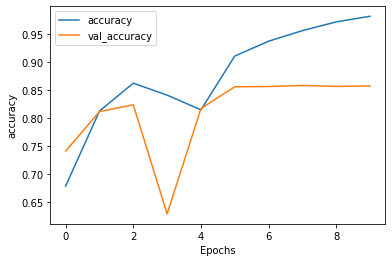

In [14]:
plot_graphs(history, 'accuracy')

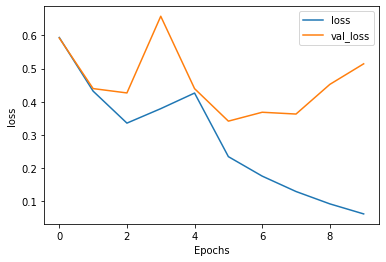

In [15]:
plot_graphs(history, 'loss')